# AOM Rise Time Measurement. 

In this script I will be aiming to look at the rise time of the AOM from the .csv files from the Oscilloscope. 

In [1]:
import pandas as pd
import numpy as np 
import scipy.optimize as opt
import os 
import matplotlib.pyplot as plot 
import re
import mplcursors

In [2]:
def import_data(data_file):
    '''Import the data into a numpy/scipy array.'''
    
    data = pd.read_table(data_file)
    
    return(data)

In [3]:
def import_numpy(data_file):
        
    data = np.loadtxt(data_file, delimiter=",")
        
    return(data)

In [4]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [39]:
# folder path 
folder = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\STED AO Calib and Setup\\20210505\\'
#extract the date from the folder name. 
date = folder[-9:-1]

file = 'DSO00015'

data = import_data(folder + file + '.csv')

set_plot_params()
time = []
reference = []
signal = []


for i in range(len(data)-1):
    line_data = data['Source,CH1,CH2'][i+1][0:-1]
    a = []
    a.append(line_data.find(','))
    a.append(len(line_data[::-1]) - 1 - line_data[::-1].find(','))
    time.append(float(line_data[0:a[0]])) 
    reference.append(float(line_data[a[0]+1:a[1]])) 
    signal.append(float(line_data[a[1]+1:-1]))
    
#print(np.array(separated_data[0:10]))
#time = data['Source'][1:-1]


In [40]:
print(data['Source,CH1,CH2'][3])

-0.00000899600,3.04000,0.09800,


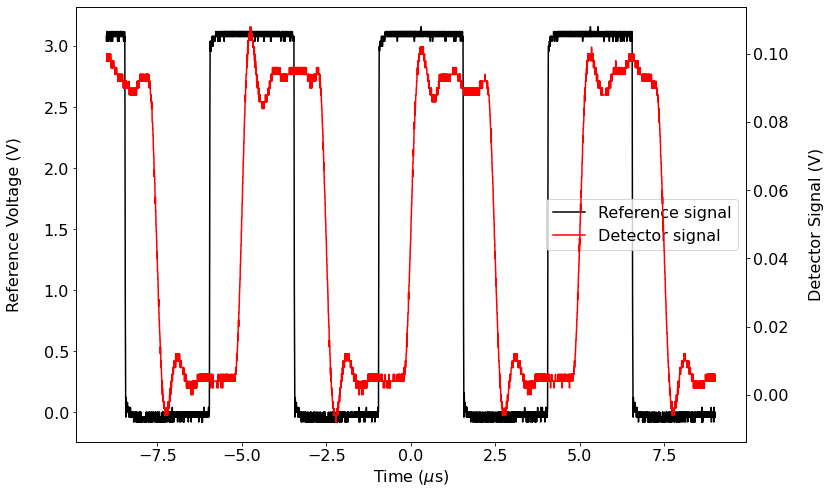

In [42]:
fig, ax = plot.subplots()
ax1 = ax.twinx()
time = np.array(time)
reference = np.array(reference)
signal = np.array(signal)

tau = 1000000

#time = time*tau

plt1 =ax.plot(time, reference, color = 'k', label = 'Reference signal')
plt2 = ax1.plot(time, signal, color = 'r', label = 'Detector signal')
#ax.legend(plt1, plt2)

ax.set_xlabel(r'Time ($\mu$s)')
ax.set_ylabel('Reference Voltage (V)\n')
ax1.set_ylabel('\nDetector Signal (V)')

#ax1.axis([-2, 16, -0.01, 0.3])
#ax.axis([-2, 16, -0.1, 3.5])
lns = plt1+plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

y_1 = [-0.1, 0.4]
response_time_1 = [1.16, 1.16]
rise_time = [0.7, 0.7]
#ax1.axis([-5, 55, 0, 0.2])

#ax1.plot(response_time_1, y_1, linestyle = '--', color = 'k')
#ax1.plot(rise_time, y_1,  linestyle = '--', color = 'k')

#ax1.annotate(s='', xy=(0, 0.15), xytext=(0.7, 0.15), arrowprops=dict(arrowstyle='<->'))
#ax1.text(0.2, 0.155, r'$t_{1}$')
#ax1.annotate(s='', xy=(0.7, 0.175), xytext=(1.16, 0.175), arrowprops=dict(arrowstyle='<->'))
#ax1.annotate(s='', xy=(0, 0.2), xytext=(1.16, 0.2), arrowprops=dict(arrowstyle='<->'))
#ax1.text(0.4, 0.205, r'$t_{2}$')

#fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\AOM\\double_pass_plot.pdf')

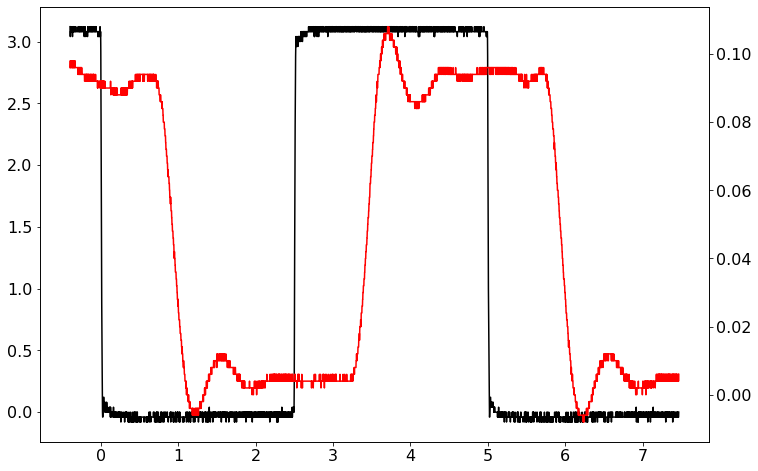

response time rise (us) = [1.096]
response time fall (us) = [1.064]
delay time rise (us) = [0.7940000000000005]
delay time fall (us) = [0.702]


In [43]:
counter = []
a = []
# find all the points where the signal generator is on. 
max_sig = np.max(reference)
for i in range (len(reference)-1):
    if reference[i] > 0.75 * max_sig:
        counter.append(i)

# Find the start/end points of a waveform. 
b = np.array(counter)
for i in range(len(b)-1):
    if b[i]+1 != b[i+1]:
        a.append(i)

# is there more than 1 waveform in tne dataset? 
if a == []:
    diff = int(2*(counter[-1] - counter[0]) + counter[0])
    a.append(int(counter[0]))
else:
    diff = int(3*(a[1] - a[0]) + a[0])

    # Set the time to t = 0 for the wave. 
time = time - time[a[0]]

indexes = np.linspace(a[0]-200, diff, (diff - (a[0] - 200)) + 1, dtype = int)

fig, ax = plot.subplots()
ax1 = ax.twinx()
# plot the reference and detector signals. 
plt1 = ax.plot(time[a[0]-200:diff], reference[a[0]-200:diff], color = 'k', label = 'Reference signal')
plt2 = ax1.plot(time[a[0]-200:diff], signal[a[0]-200:diff], color = 'r', label = 'Detector signal')
mplcursors.cursor(multiple=True)
plot.show()

# add the legend. 
lns = plt1+plt2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.set_xlabel(r'Time ($\mu$s)')
ax.set_ylabel('Reference Voltage (V)\n')
ax1.set_ylabel('\nDetector Signal (V)')
#ax.axis([time[a[1]-200], time[diff], -0.1, 3.5])
ax1.axis([time[a[1]-200], time[diff], -0.005, 0.2])


switch_on = []
switch_off = []
z = 0

delay_time_rise = []
delay_time_fall = []
response_time_rise = []
response_time_fall = [] 

for i in range(len(indexes)-1):
    if reference[indexes[i]] > 0.8 * max_sig:
        switch_on.append(indexes[i])
        z = 1
    if reference[indexes[i]] < 0.2 * max_sig and z == 1:
        switch_off.append(indexes[i])
        
stop_rise = 0
for j in range(len(switch_on)-1):
    if switch_on[j] + 1 != switch_on[j+ 1]: 
        stop_rise = switch_on[j+1]-2

stop_drop = 0
for j in range(len(switch_off)-1):
    if switch_off[j] + 1 != switch_off[j+ 1]: 
        stop_drop = switch_off[j+1]-2

if stop_rise == 0:
    stop_rise = switch_on[0]-4
if stop_drop == 0:
    stop_drop = switch_on[-1]-2

detector_on = 0.9*np.max(signal)
detector_off = 0.01

ax.scatter(time[stop_rise], reference[stop_rise])
ax.scatter(time[stop_drop], reference[stop_drop])



for i in range(stop_drop - stop_rise):
    if signal[stop_rise + i] > detector_on and response_time_rise == []:
        response_time_rise.append(time[stop_rise + i] - time[stop_rise])
        ax1.scatter(time[stop_rise + i], signal[stop_rise + i], color = 'm')
    
    if signal[stop_rise + i + 1] > detector_off  and delay_time_rise == []: 
        delay_time_rise.append(time[stop_rise + i] - time[stop_rise])
        ax1.scatter(time[stop_rise + i], signal[stop_rise + i], color = 'c')
        
for i in range(indexes[-1] - stop_drop):
    if signal[stop_drop + i] < detector_off and response_time_fall == []:
        response_time_fall.append(time[stop_drop + i] - time[stop_drop])
        ax1.scatter(time[stop_drop + i], signal[stop_drop + i], color = 'm')
        
    if signal[indexes[-1]-i] < signal[indexes[-1]-i+5] and signal[indexes[-1]-i] > 0.05 and delay_time_fall == []: 
        delay_time_fall.append(time[indexes[-1]-i] - time[stop_drop])
        ax1.scatter(time[indexes[-1]-i], signal[indexes[-1]-i], color = 'c')


        
print('response time rise (us) = ' + str(response_time_rise))
print('response time fall (us) = ' + str(response_time_fall))
print('delay time rise (us) = ' + str(delay_time_rise))
print('delay time fall (us) = ' + str(delay_time_fall))


In [26]:
0.165/0.195

0.8461538461538461

In [44]:
616*0.61/1.35

278.3407407407407

In [45]:
(40*40)/0.1

16000.0

In [48]:
16000*0.0015

24.0

In [49]:
1/7.98


0.12531328320802004

In [50]:
0.125*16000

2000.0